In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from numpy.random import uniform

In [2]:
nr_of_shapes = 2

In [3]:
def generate_mixed_shape(shape1, shape2, shape3, shape4):
    shape = []
    shape.extend(shape1[:15].tolist())
    shape.extend(shape2[15:30].tolist())
    shape.extend(shape3[30:45].tolist())
    shape.extend(shape4[45:60].tolist())
    return pd.DataFrame([shape])

In [4]:
def generate_noisy_shape(shape):
    noisyShape = []
    for val in shape:
        noisyShape.append(val + uniform(-0.3, 0.3))
    return pd.DataFrame([noisyShape])

In [5]:
symbol_data = pd.read_csv("runesheet.csv", header=None)
X = symbol_data.iloc[:, :-1]
Y = symbol_data.iloc[:,-1:]
Y = Y.replace("Time", 0)
Y = Y.replace("Wind", 1)

'''for i in range(100):
    random_symbols = X.sample(n=4)
    X = pd.concat([X, generate_mixed_shape(random_symbols.iloc[0], random_symbols.iloc[1], random_symbols.iloc[2], random_symbols.iloc[3])])
    Y = pd.concat([Y, pd.DataFrame([2], columns =[60])])
 
for i in range(100):
    random_symbol = X.sample(n=1)
    X = pd.concat([X, pd.DataFrame(generate_noisy_shape(random_symbol.iloc[0]))])
    Y = pd.concat([Y, pd.DataFrame([2], columns =[60])])'''

x_train, x_test, y_train, y_test = train_test_split(np.array(X), Y, test_size=0.20)


y_test = y_test.values.flatten()
y_train = y_train.values.flatten()

y_test = tf.one_hot(y_test, nr_of_shapes)
y_train = tf.one_hot(y_train, nr_of_shapes)

In [6]:
model = Sequential([
  Dense(20, input_dim=60, activation='relu', kernel_initializer='he_uniform'),
  Dense(nr_of_shapes, activation='softmax')
])

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt,
metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=1000, verbose=0)

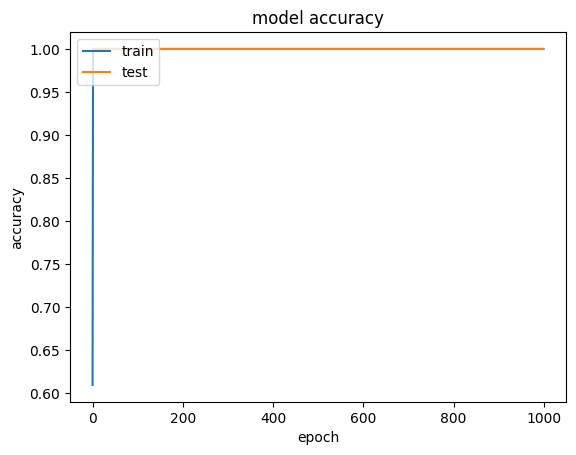

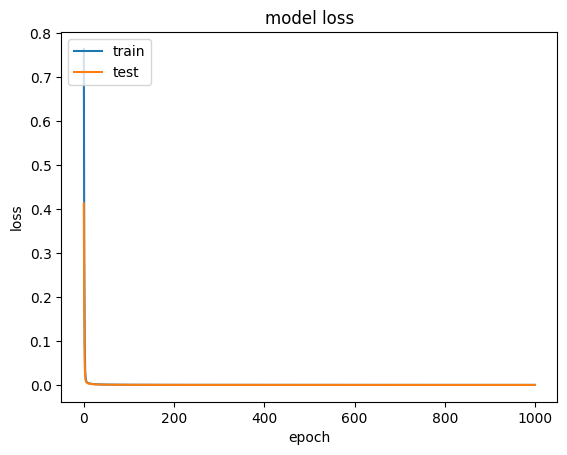

In [7]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
#model.save('model_with_other')

In [9]:
model.predict(x_test)

3/3 [==============================] - 0s 5ms/step


array([[1.0738077e-05, 9.9998927e-01],
       [8.6913351e-06, 9.9999130e-01],
       [7.7110963e-06, 9.9999225e-01],
       [9.9998343e-01, 1.6533440e-05],
       [9.9997115e-01, 2.8906452e-05],
       [9.9999011e-01, 9.9001372e-06],
       [6.5112863e-06, 9.9999344e-01],
       [9.9998415e-01, 1.5856320e-05],
       [4.5106153e-06, 9.9999547e-01],
       [9.9980193e-01, 1.9809751e-04],
       [9.9997520e-01, 2.4799934e-05],
       [1.1818702e-05, 9.9998820e-01],
       [6.9824168e-06, 9.9999297e-01],
       [9.9998522e-01, 1.4752018e-05],
       [1.9736874e-05, 9.9998021e-01],
       [5.4053057e-06, 9.9999464e-01],
       [9.9997926e-01, 2.0732472e-05],
       [1.4702370e-05, 9.9998534e-01],
       [4.5606439e-06, 9.9999547e-01],
       [9.9998498e-01, 1.5079066e-05],
       [6.5357858e-06, 9.9999344e-01],
       [8.2259858e-06, 9.9999177e-01],
       [9.9996877e-01, 3.1192241e-05],
       [1.0472460e-05, 9.9998951e-01],
       [4.3006869e-05, 9.9995697e-01],
       [1.1626176e-05, 9.

In [10]:
y_test

<tf.Tensor: shape=(80, 2), dtype=float32, numpy=
array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],